# Project: Milk Production Forecasting

## Project description: 

Milk is one of the most important and widely consumed agricultural products in the world. It is not only a significant source of nutrition but also plays a crucial role in the global economy. Accurate forecasting of milk production is therefore essential for dairy farmers, milk processing companies, and policymakers to make informed decisions. 
By using advanced statistical and machine learning techniques, forecasting milk production can help to optimize production processes, reduce wastage, and ensure a stable supply of milk in the market. 
In this project, you must explore the different methods used for forecasting milk production and the importance of accurate forecasting in the dairy industry.



##  import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## import data set

In [2]:
df = pd.read_csv(r'C:\Users\AK\Desktop\file\milk.csv')

In [3]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [4]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [7]:
df.columns= ['Month', 'Milk in pounds per cow']
df.head()

,Month,Milk in pounds per cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [8]:
df.drop(168,axis=0,inplace=True)

In [9]:
df['Month']= pd.to_datetime(df['Month'])

In [10]:
df['Month']

0     1962-01-01
1     1962-02-01
2     1962-03-01
3     1962-04-01
4     1962-05-01
         ...    
163   1975-08-01
164   1975-09-01
165   1975-10-01
166   1975-11-01
167   1975-12-01
Name: Month, Length: 168, dtype: datetime64[ns]

In [11]:
df.set_index('Month',inplace=True)

In [12]:
df

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
...,...
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0


In [13]:
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [14]:
df.describe()

,Milk in pounds per cow
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


In [16]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

<Axes: xlabel='Month'>

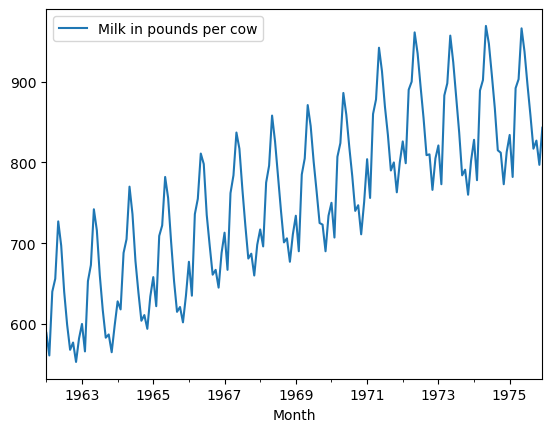

In [17]:
df.plot()

We can observe that there is an increasing trend and very strong seasonality in our data.

In [19]:
timeseries = df['Milk in pounds per cow']

In [20]:
type(timeseries)

pandas.core.series.Series

<Axes: xlabel='Month'>

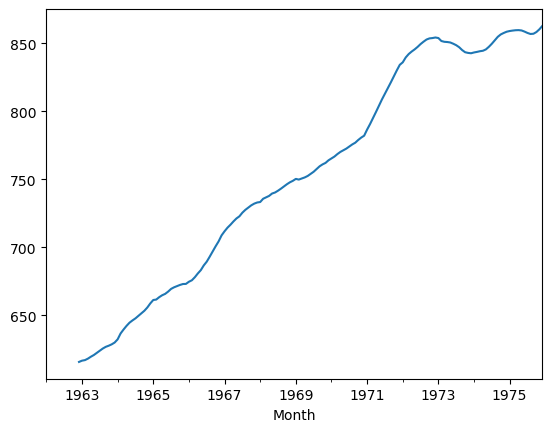

In [21]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')

<Axes: xlabel='Month'>

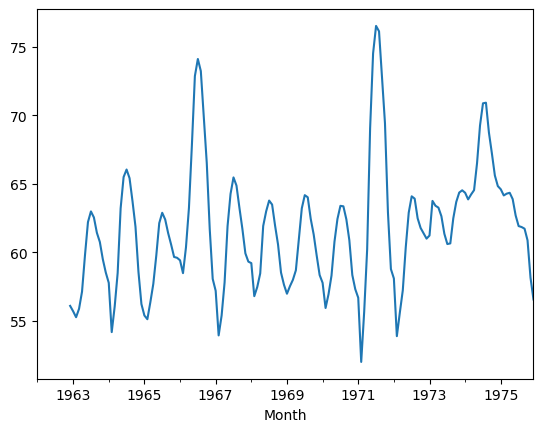

In [22]:
timeseries.rolling(12).std().plot(label='12 Month Rolling Mean')

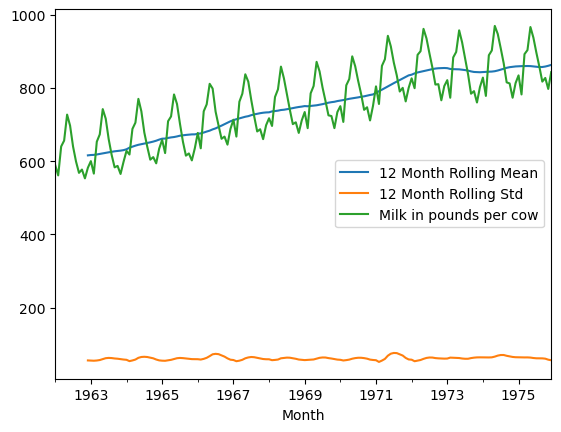

In [23]:
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

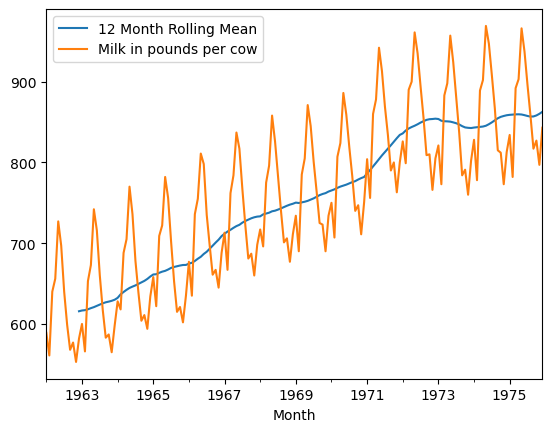

In [24]:
timeseries.rolling(12).mean().plot(label = '12 Month Rolling Mean')
timeseries.plot()
plt.legend()

In [25]:
# Now let us check the ETS decomposition plot (Trend, Seasonallity and Residual)
from statsmodels.tsa.seasonal import seasonal_decompose

In [27]:
decomp = seasonal_decompose(timeseries)

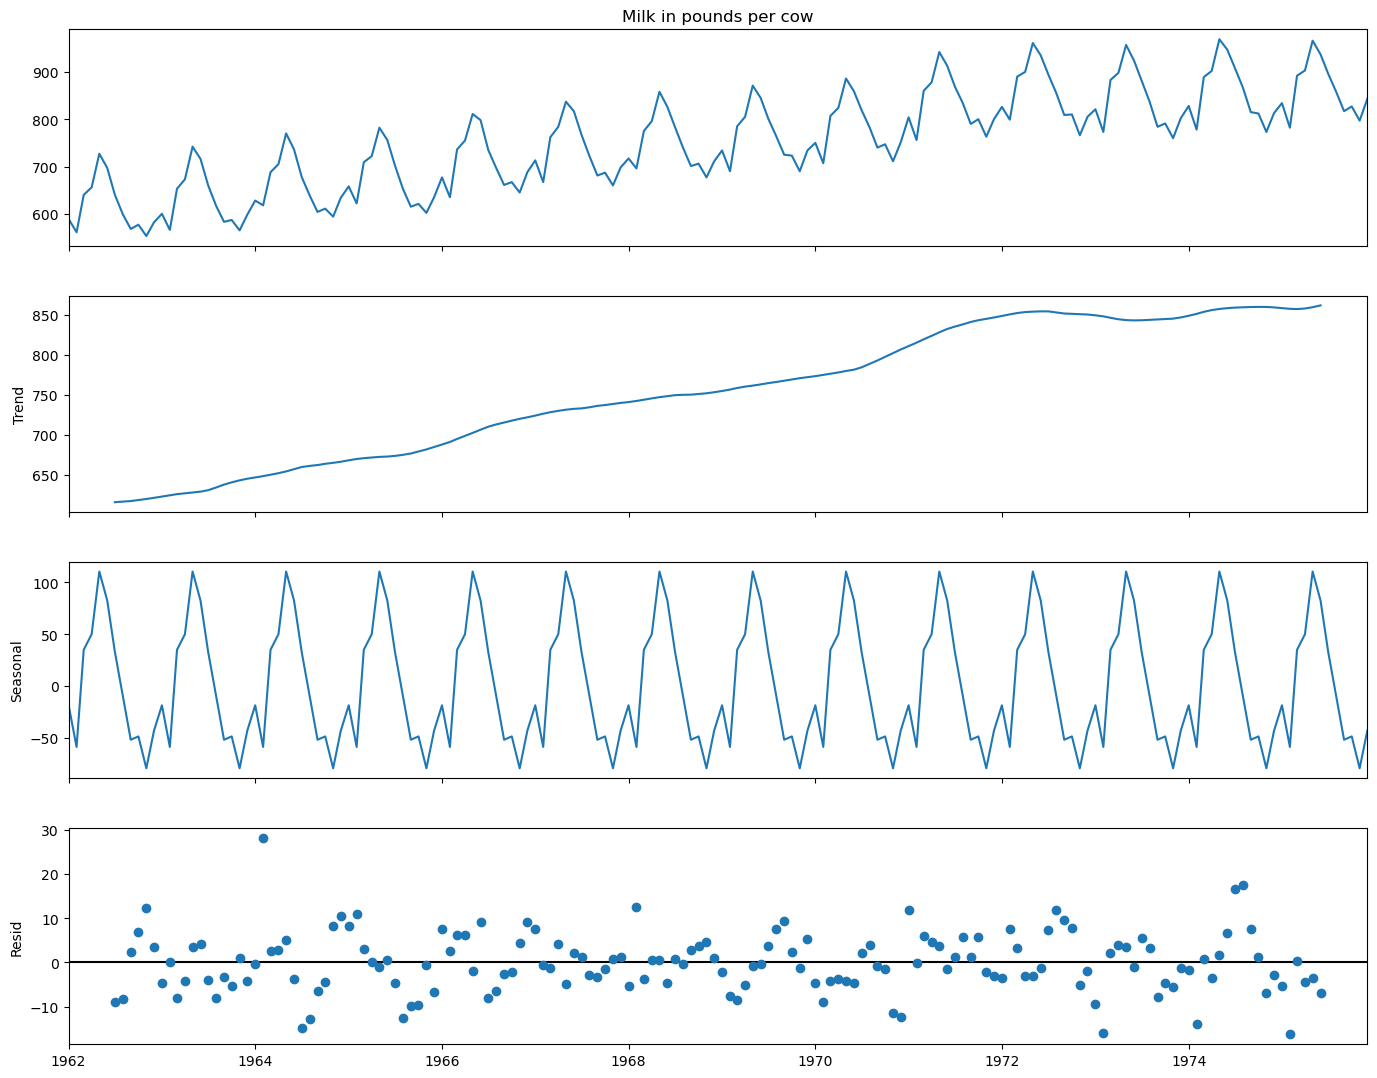

In [28]:
fig = decomp.plot()
fig.set_size_inches(15,12)

The decomposition of time series is a statistical method to deconstruct time series into its trend, seasonal and residual components:

Trend: This is the general, long term tendency of the data to increase or decrease with time.

Seasonality: It is the non-random component that repeats itself at regular intervals.

Residual: It is the random, unpredictable variation in the series that is not accounted for by the trend or seasonality. It is the difference between the observed value of the time series and the predicted value based on the trend and seasonality.

In [29]:
df.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


## Augmented Dickey fuller test(ADF)

Null Hypothesis: Unit root exists, time series is not stationary

Alternate Hypothesis: Unit root does not exist, time series is stationary

In [46]:
from statsmodels.tsa.stattools import adfuller

In [47]:
result=adfuller(df['Milk in pounds per cow'])

In [48]:
labels = ['ADF Test Statistic',
          'p-value',
          '#Lags Used',
          'Number of Observations Used']

In [49]:
labels

['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']

In [50]:
for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    

ADF Test Statistic : -1.3038115874221312
p-value : 0.6274267086030308
#Lags Used : 13
Number of Observations Used : 154


In [51]:
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [56]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic',
              'p-value',
              '#Lags Used',
              'Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [57]:
df['Milk First Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(1)

We can apply differencing to make time series stationary by subtracting the previous observations from the current observations. Doing so we will eliminate trend and seasonality, and stabilize the mean of time series.

In [58]:
df['Milk First Difference'] 

Month
1962-01-01     NaN
1962-02-01   -28.0
1962-03-01    79.0
1962-04-01    16.0
1962-05-01    71.0
              ... 
1975-08-01   -38.0
1975-09-01   -41.0
1975-10-01    10.0
1975-11-01   -30.0
1975-12-01    46.0
Name: Milk First Difference, Length: 168, dtype: float64

In [59]:
adf_check(df['Milk First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.0549955586530544
p-value : 0.03006800400178694
#Lags Used : 14
Number of Observations Used : 152
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

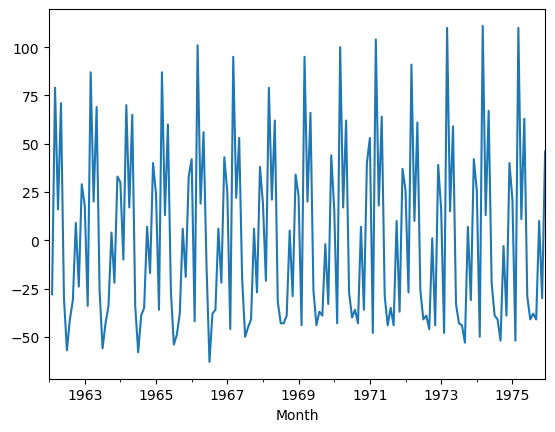

In [60]:
df['Milk First Difference'].plot()

In [61]:
df['Seasonal Difference'] = df['Milk in pounds per cow'] - df['Milk in pounds per cow'].shift(12)

In [62]:
df['Seasonal Difference']

Month
1962-01-01     NaN
1962-02-01     NaN
1962-03-01     NaN
1962-04-01     NaN
1962-05-01     NaN
              ... 
1975-08-01    -9.0
1975-09-01     2.0
1975-10-01    15.0
1975-11-01    24.0
1975-12-01    30.0
Name: Seasonal Difference, Length: 168, dtype: float64

<Axes: xlabel='Month'>

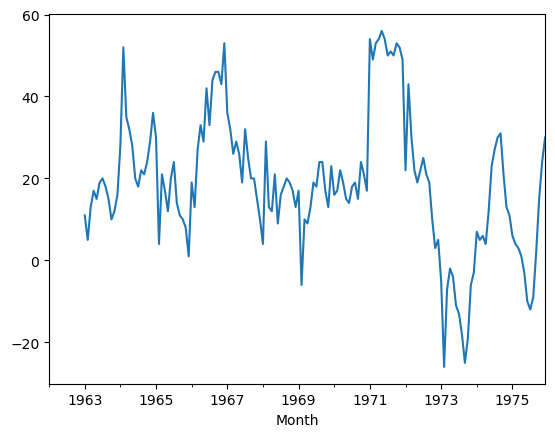

In [63]:
df['Seasonal Difference'].plot()

In [64]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.3354193143593953
p-value : 0.1607988052771142
#Lags Used : 12
Number of Observations Used : 143
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [65]:
df['Seasonal First Difference'] = df['Milk First Difference'] - df['Milk First Difference'].shift(12)

<Axes: xlabel='Month'>

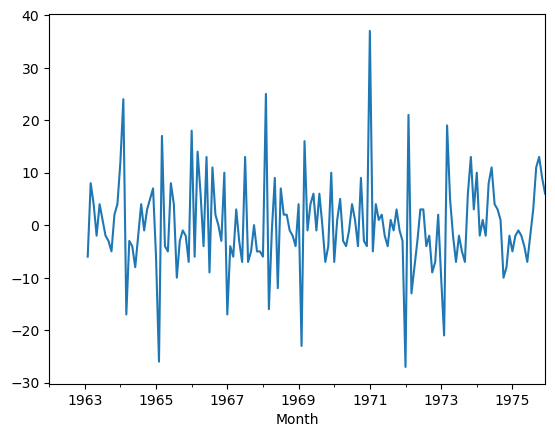

In [66]:
df['Seasonal First Difference'].plot()

In [67]:
df['Seasonal First Difference']

Month
1962-01-01     NaN
1962-02-01     NaN
1962-03-01     NaN
1962-04-01     NaN
1962-05-01     NaN
              ... 
1975-08-01     3.0
1975-09-01    11.0
1975-10-01    13.0
1975-11-01     9.0
1975-12-01     6.0
Name: Seasonal First Difference, Length: 168, dtype: float64

In [68]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.038002274921973
p-value : 1.865423431878921e-05
#Lags Used : 11
Number of Observations Used : 143
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [69]:
df['Seasonal First Difference']

Month
1962-01-01     NaN
1962-02-01     NaN
1962-03-01     NaN
1962-04-01     NaN
1962-05-01     NaN
              ... 
1975-08-01     3.0
1975-09-01    11.0
1975-10-01    13.0
1975-11-01     9.0
1975-12-01     6.0
Name: Seasonal First Difference, Length: 168, dtype: float64

## Plot acf and pacf 

In [70]:
from statsmodels.graphics.tsaplots  import plot_acf,plot_pacf

<Axes: xlabel='Month'>

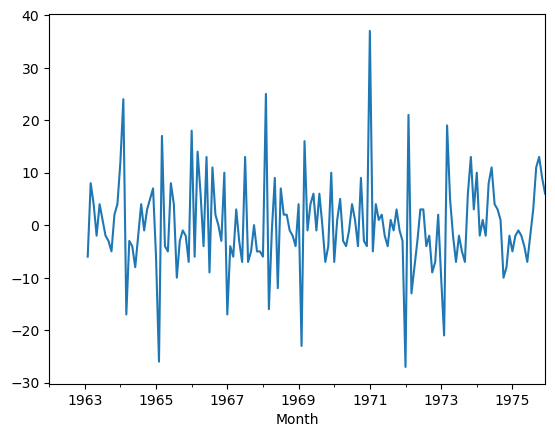

In [71]:
df['Seasonal First Difference'].plot()

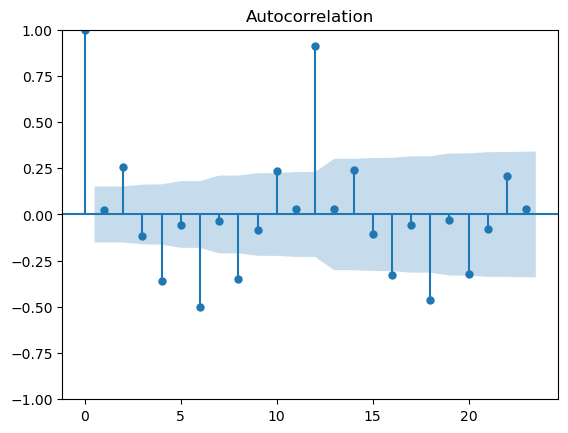

In [72]:
fig_first = plot_acf(df["Milk First Difference"].dropna())

In [73]:
k=df["Milk First Difference"].dropna()
k

Month
1962-02-01   -28.0
1962-03-01    79.0
1962-04-01    16.0
1962-05-01    71.0
1962-06-01   -30.0
              ... 
1975-08-01   -38.0
1975-09-01   -41.0
1975-10-01    10.0
1975-11-01   -30.0
1975-12-01    46.0
Name: Milk First Difference, Length: 167, dtype: float64

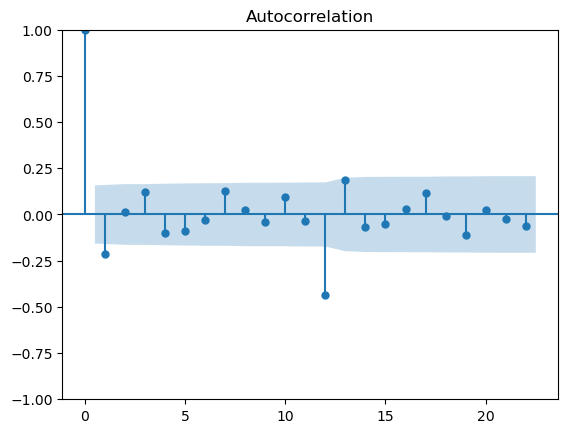

In [74]:
fig_seasonal_first = plot_acf(df["Seasonal First Difference"].dropna())

In [75]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

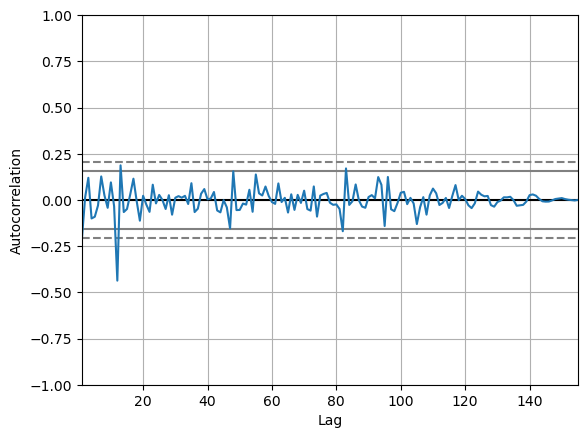

In [76]:
autocorrelation_plot(df['Seasonal First Difference'].dropna())

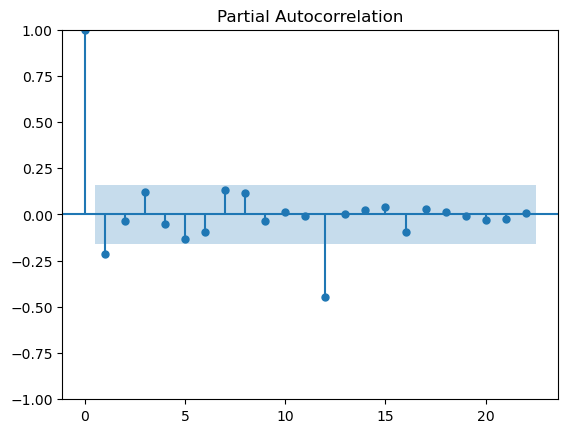

In [77]:
result = plot_pacf(df["Seasonal First Difference"].dropna())

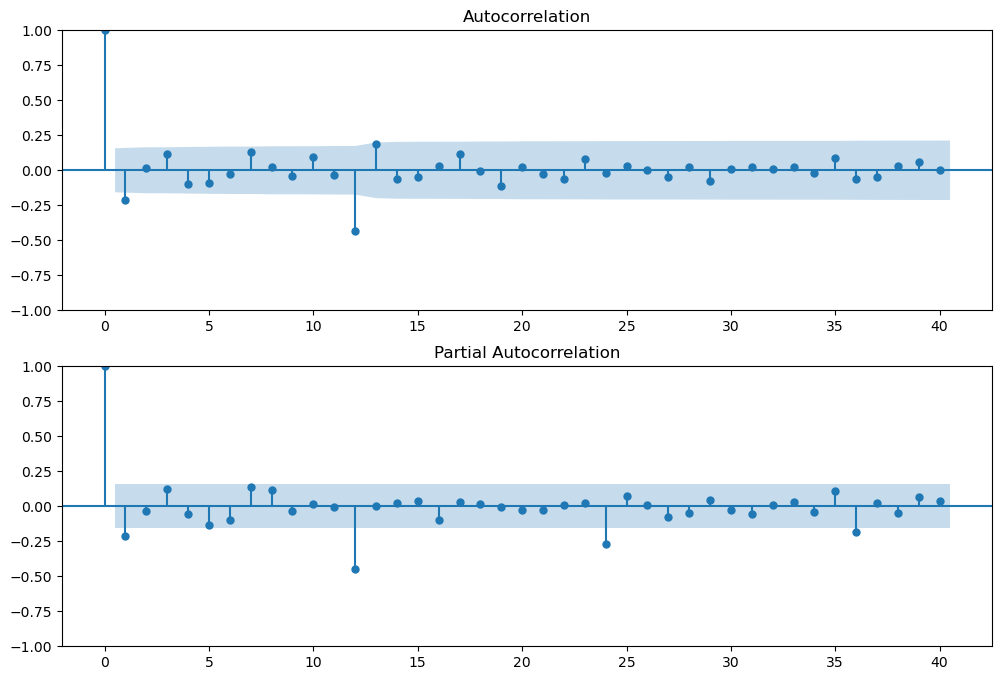

In [78]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags = 40,ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags = 40, ax = ax2)

In [79]:
from statsmodels.tsa.arima_model import ARIMA

In [80]:
model = sm.tsa.statespace.SARIMAX(df['Milk in pounds per cow'],order = (0,1,0),seasonal_order = (1,1,1,12))

In [81]:
results = model.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:               Milk in pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Wed, 15 May 2024   AIC                           1074.131
Time:                                      17:12:38   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

<Axes: xlabel='Month'>

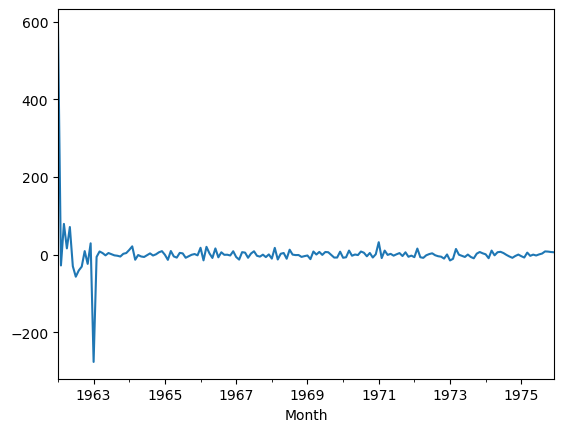

In [82]:
results.resid.plot()

<Axes: ylabel='Density'>

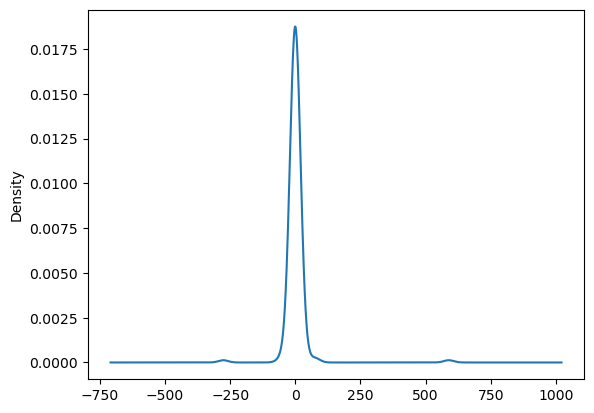

In [83]:
results.resid.plot(kind='kde')

<Axes: xlabel='Month'>

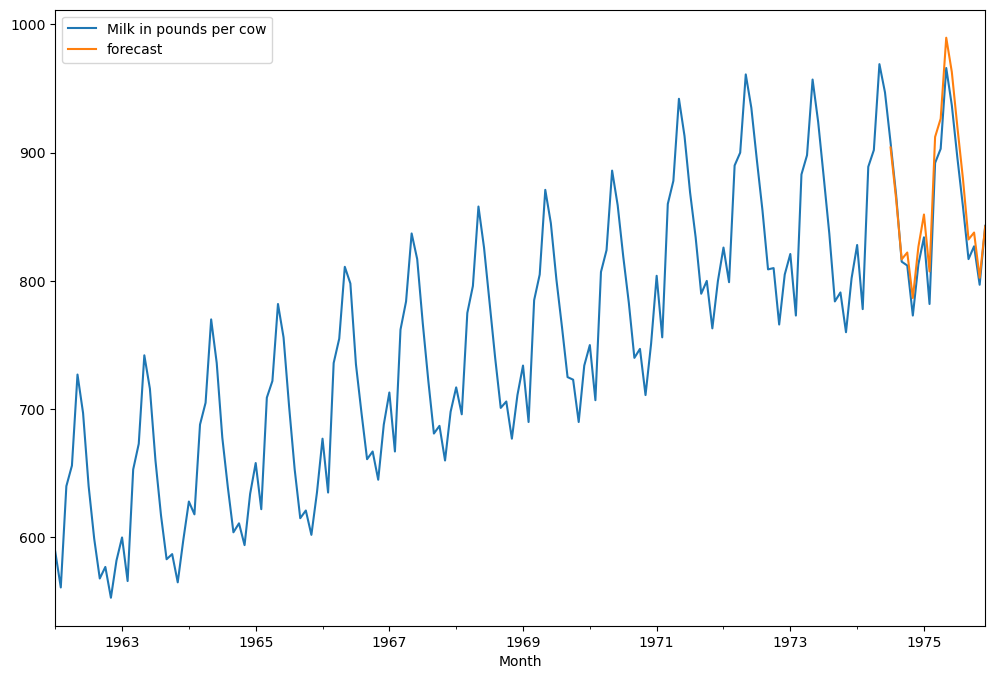

In [86]:
df['forecast'] = results.predict(start = 150,end = 168,dynamic = True)  
df[['Milk in pounds per cow','forecast']].plot(figsize = (12, 8))

In [87]:
df.tail()

,Milk in pounds per cow,Milk First Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,
1975-08-01,858.0,-38.0,-9.0,3.0,879.668975
1975-09-01,817.0,-41.0,2.0,11.0,832.328554
1975-10-01,827.0,10.0,15.0,13.0,837.722250
1975-11-01,797.0,-30.0,24.0,9.0,802.452737
1975-12-01,843.0,46.0,30.0,6.0,842.499871


In [88]:
from pandas.tseries.offsets import DateOffset

In [90]:
future_dates=[df.index[-1] + DateOffset(months = x) for x in range(0,24) ]

In [91]:
future_dates

[Timestamp('1975-12-01 00:00:00'),
 Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [92]:
future_dates_df = pd.DataFrame(index = future_dates[1:],columns = df.columns)

In [93]:
future_df = pd.concat([df,future_dates_df])

In [94]:
future_df.head()

,Milk in pounds per cow,Milk First Difference,Seasonal Difference,Seasonal First Difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN
1962-03-01,640.0,79.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,NaN,NaN,NaN


In [95]:
future_df.tail()

,Milk in pounds per cow,Milk First Difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN


<Axes: >

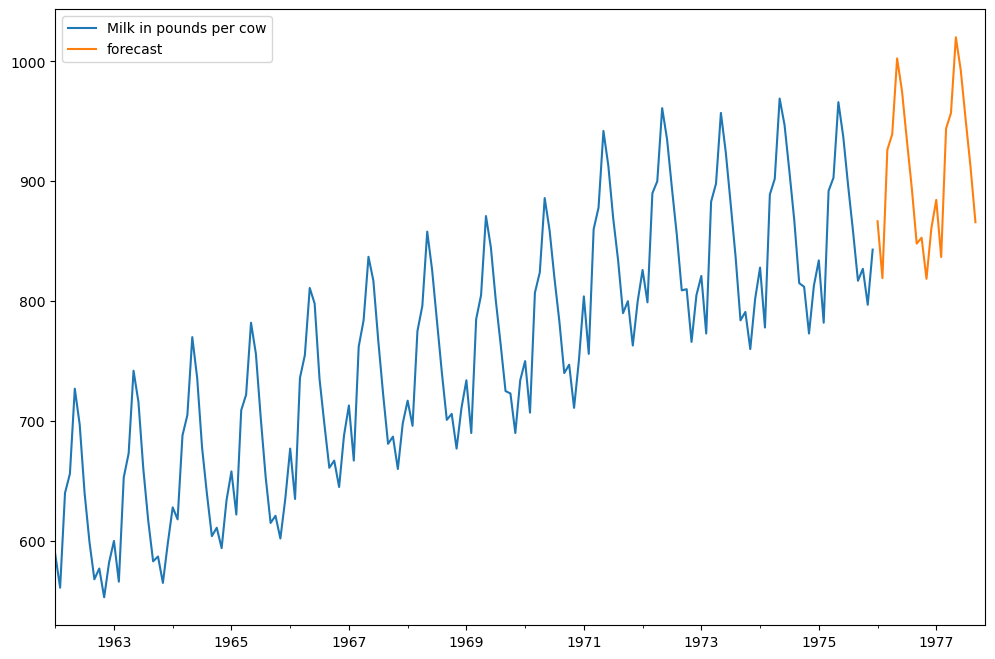

In [96]:
future_df['forecast'] = results.predict(start = 168, end = 188,dynamic= True)  
future_df[['Milk in pounds per cow', 'forecast']].plot(figsize = (12, 8)) 

We have successfully forecasted for next 2 years and seems that it fits in well.